In [7]:
#주로 자주 import하는 전처리기
#from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
#한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Users/swany/malgun.ttf").get_name()
rc('font',family=font_name)

Text(0, 0.5, '타깃')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


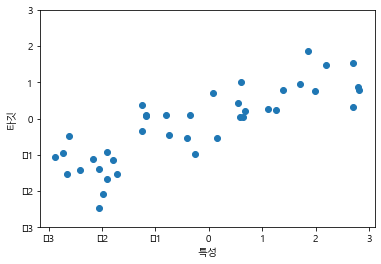

In [9]:
#3주차 회귀분석
#데이터 Wave
#함수를 이용해서 분석
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [10]:
#KNN회귀 분석
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#훈련세트와 테스트세트 구분
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#이웃의 수 3 설정
reg=KNeighborsRegressor(n_neighbors=3)
#모델 학습
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
#성능 평가
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2:0.83


C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


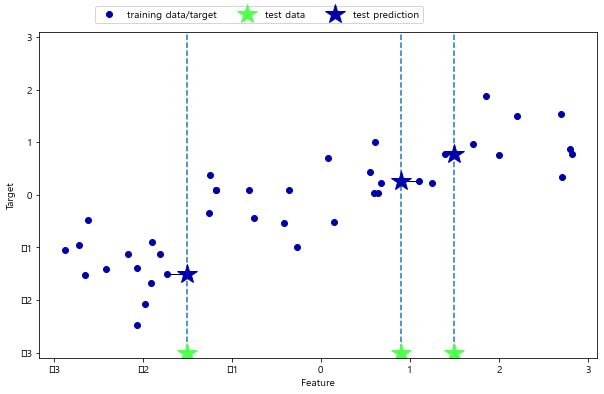

In [14]:
#n_neighbors의 값을 변화시키고 확인
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


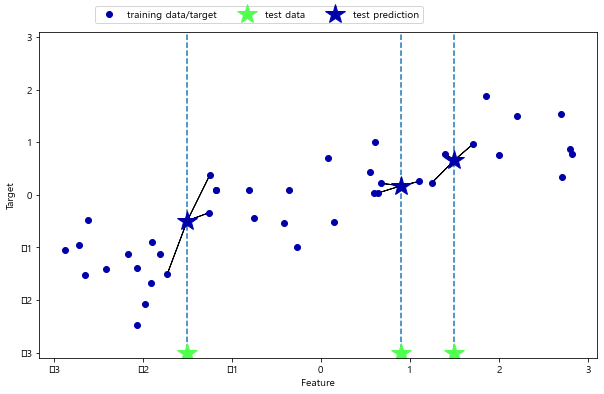

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#훈련세트와 테스트세트 구분
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

#이웃의 수 3 설정
reg=KNeighborsRegressor(n_neighbors=3)
#모델 학습
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]


In [19]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test,y_test)))
#테스트 사이즈를 변경하면 예측값이 달라진다.

테스트 세트 R^2:0.68


X_train.shape:(24, 1) X_test.shape:(16, 1)
X_train.shape:(24, 1) X_test.shape:(16, 1)
X_train.shape:(24, 1) X_test.shape:(16, 1)


C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


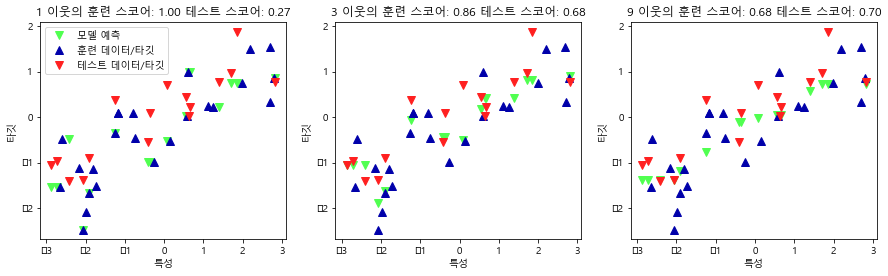

In [26]:
#결정계수
#성능측정
fig,axes = plt.subplots(1,3,figsize=(15,4))
for n_neighbors,ax in zip([1,3,9],axes):
    #1,3,9이웃을 사용한 예측
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    print("X_train.shape:{}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train,y_train)
    ax.plot(X_test,reg.predict(X_test),'v',c=mglearn.cm3(2),markersize=8)
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
    n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측","훈련 데이터/타깃", "테스트 데이터/타깃"],loc="best")
#이웃값의 수가 많아질수록 결과가 달라진다. 더 경계가 부드러워진다.

In [105]:
#기울기, 절편 구하기
# x값과 y 값
x=[2, 4, 6, 8]
y=[81, 93, 91, 97]
# x와 y 의 평균값
mx =np.mean (x)
my =np.mean (y)
print("x의 평균값 :",mx)
print("y의 평균값 :",my)

x의 평균값 : 5.0
y의 평균값 : 90.5


In [28]:
#선형 회귀
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

In [33]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))
#과소적합

훈련 세트 점수:0.67
테스트 세트 점수:0.66


In [107]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)
#기울기와 절편 확인

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

훈련 세트 점수:0.63
테스트 세트 점수:0.77


(-3.0, 3.0)

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


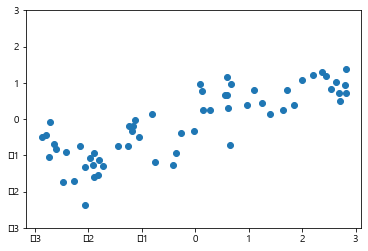

In [116]:
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=60)

lr2=LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lr2.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr2.score(X_test,y_test)))
plt.plot(X,y,'o')
plt.ylim(-3,3)

훈련 세트 점수:0.66
테스트 세트 점수:0.65


(-3.0, 3.0)

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


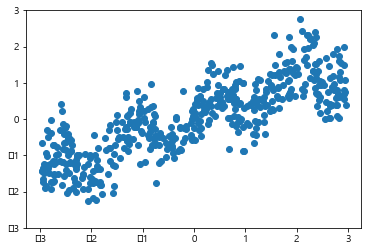

In [110]:
X,y=mglearn.datasets.make_wave(n_samples=500)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=60)

lr3=LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lr3.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr3.score(X_test,y_test)))
plt.plot(X,y,'o')
plt.ylim(-3,3)

In [38]:
#데이터 살펴보기
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys():{}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름:\n{}\n".format(boston.feature_names))
print(boston['DESCR']+"\n...")

df=pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys():dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS  

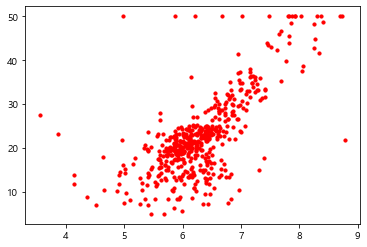

In [39]:
import matplotlib.pyplot as plt
plt.scatter(boston.data[:,5],boston.target,color='r',s=10)
#대체적으로 비례함을 알 수 있음

In [40]:
#속성 하나로 선형회귀 실험
X=boston.data[:,5]
print(X.shape)

X_1=np.atleast_2d(X)
X_2=np.transpose(X_1)
print(X_2.shape)
y=boston.target

lr.fit(X_2,y)

y_predicted = lr.predict(X_2)

print("x[0]: %f b: %f" %(lr.coef_[0],lr.intercept_))

(506,)
(506, 1)
x[0]: 9.102109 b: -34.670621


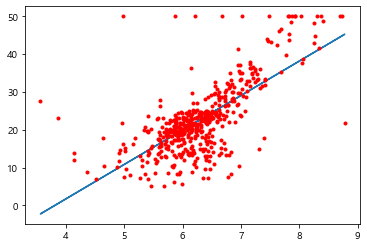

In [41]:
#선형회귀모델 그리기
plt.plot(X_2,y_predicted)
plt.plot(X_2,y,'o',color='r',markersize=3)

In [42]:
#선형회귀모델의 성능 측정
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)
print("X_train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr=LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
#선형의 결과가 좀 더 잘 나온 것임을 알 수 있음.

X_train.shape:(379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [44]:
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)
print("X_train.shape:{}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
lr=KNeighborsRegressor().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_train.shape:(379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.71
테스트 세트 점수: 0.46


In [45]:
#보스톤 확장 데이터
X,y=mglearn.datasets.load_extended_boston()

print("X_shape: {}".format(X.shape))

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
print("X_train.shape:{}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
lr=LinearRegression().fit(X_train,y_train)

X_shape: (506, 104)
X_train.shape:(379, 104) X_test.shape:(127, 104)


In [46]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
#과대적함. 복잡도의 제어가 필요.

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [48]:
lr=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [49]:
#릿지 회귀
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.89
테스트 세트 점수:0.75


In [52]:
lr=LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수:0.95
테스트 세트 점수:0.61


In [53]:
knn=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [54]:
#alpha에 따른 결과
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64


In [55]:
ridge10=Ridge(alpha=5).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.82
테스트 세트 점수:0.68


In [56]:
ridge10=Ridge(alpha=0.5).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.90
테스트 세트 점수:0.77


In [57]:
ridge10=Ridge(alpha=0.3).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.91
테스트 세트 점수:0.77


In [58]:
ridge10=Ridge(alpha=0.2).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.92
테스트 세트 점수:0.77


In [59]:
ridge10=Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.93
테스트 세트 점수:0.77


In [60]:
ridge10=Ridge(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.94
테스트 세트 점수:0.70


In [76]:
ridge01=Ridge(alpha=0.1,max_iter=1000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.94
테스트 세트 점수:0.70


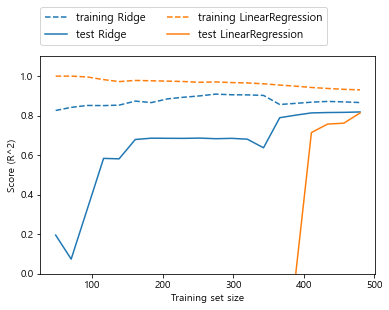

In [77]:
#학습 곡선
mglearn.plots.plot_ridge_n_samples()

In [78]:
#라쏘 회귀
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 개수:4


In [79]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수:33


In [80]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수:96


In [81]:
print("계수값:\n",lasso.coef_)
print(np.where(lasso.coef_ !=0))

계수값:
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.       

Text(0, 0.5, '계수 크기')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


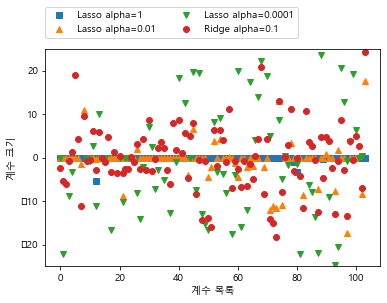

In [84]:
#라쏘 회귀
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [86]:
#IRIS 로지스틱 회귀 분류
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [87]:
iris=datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름 : {}".format(iris['target_names']))
print("특성의 이름 : {}".format(iris['feature_names']))
X=iris["data"][:,3:]
print(X.shape)
y=(iris["target"]==2).astype(np.int)
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


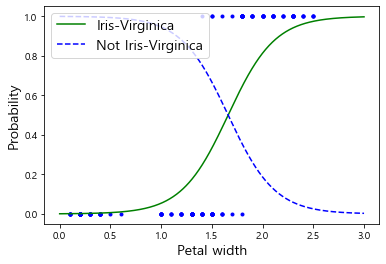

In [88]:
log_reg=LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0~3인 꽃에 대해 모델의 추정 확률

X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.xlabel("Petal width",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()

In [89]:
log_reg=LogisticRegression(solver='liblinear',penalty='l1')

In [91]:
#실행 오류
#log_reg.predict([[1.7],[1.5],[1.3],[2.0]])

C:\Users\swany\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


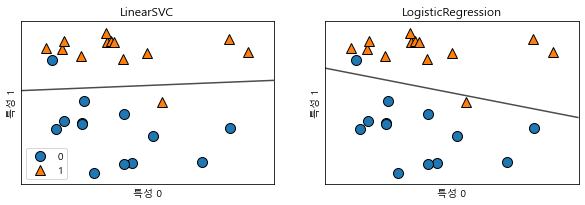

In [93]:
#로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y=mglearn.datasets.make_forge()

fig, axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [95]:
#cancer 분류 : malignant vs benign
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수:0.958
테스트 세트 점수:0.958


In [98]:
logreg100=LogisticRegression(C=100,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수:0.984
테스트 세트 점수:0.965


In [99]:
logreg001=LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수:0.953
테스트 세트 점수:0.951


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


NameError: name 'xlimes' is not defined

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


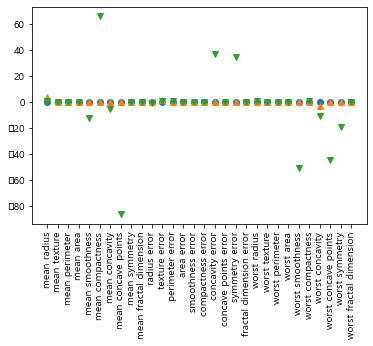

In [104]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlimes[0],xlimes[1])
plt.xlim(xlimes)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plat.ylim(-5,5)
plt.legend(loc=3)